***
<center><img src='https://github.com/HesamAsad/HesamAsad.github.io/blob/main/images/LOGO_EN_blue.png?raw=true' width=250/></center>

# <center>
## <center><span style='font-family:"Times New Roman"'><span style='background:dark'>  <font color='#1966ab'>$\LARGE{\text{Sharif University of Technology}}$</font>  <br>  <br>  <font color='#FFFFCC'>$\Large{\text{Masoud Tahmasbi}}$ </font> <br> <font color='#FFFFCC'>$\normalsize {\text{Student ID: } 402200275}$ </font>  <br>  <br> <font color='#33FFCC'>$\large{\text{EE577: Massive Data Analytics}}$</font> <br>  <font color='#FFFF00'>$\normalsize{\text{Assignment #1 - Introduction to PySpark}}$ </font>
<br>

***

# $\text{Section 1: Dataset prepartition}$


## $\text{Install Pypark & Initialization}$


In [ ]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=f7897a06c181cb101f06d2880b60a2ef4d9238fcdeefafb50964e38afeb3cf4a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Copy of data.tar.gz' data
!tar -xzvf "/content/data"

Mounted at /content/gdrive
news_data.jsonl


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

## $\text{Reading the data}$

In [ ]:
news_rdd = sc.textFile("news_data.jsonl")

In [ ]:
news_rdd = sc.textFile("news_data.jsonl")
news_rdd.takeSample(False, 1, 12)

['{"body": "نشست بزرگداشت روز جهانی حافظ شیرازی 20 مهرماه در دانشگاه پکن برگزار می شود.\\n\\n- ایرنا نوشت: با همکاری مشترک گروه زبان و ادبیات فارسی دانشگاه پکن و رایزنی فرهنگی جمهوری اسلامی ایران در چین، نشست بزرگداشت روز جهانی حافظ شیرازی روز پنجشنبه 20 مهرماه ساعت 10:30 تا 12 در دانشگاه پکن برگزار می شود.\\n\\nدر این نشست، محسن بختیار، سفیر و نعمت الله ایران زاده، رایزن فرهنگی جمهوری اسلامی ایران در چین، پروفسور چن مینْگ، رییس محترم دانشکده زبان های خارجی دانشگاه پکن، بهادر باقری، استاد مدعو زبان و ادبیات فارسی دانشکده زبان های خارجی دانشگاه پکن، سخنرانی می کنند.\\n\\nخانم وانگ یی دان، استاد رشته زبان و ادبیات فارسی دانشگاه پکن، شی گوانگ، استاد رشته زبان و ادبیات فارسی و مدیر مرکز پژوهش های فرهنگ ایران در دانشگاه پکن و لیو یینگ جون، استاد و مدیر گروه زبان و ادبیات فارسی دانشگاه پکن از دیگر سخنرانان این نشست هستند.", "image_title_url": "https://ettelaat.com/files/fa/news/1402/7/20/82679_282.jpg", "language": "fa", "source": "موتور جستجوی قطره", "title": "ادای احترام چینی ها به حافظ +ع

***

# $\text{Section 2: Preprocessing}$
$\text{This section we try to normalize news and remove useless characters (for example /n and /} \\ \text{u200c and ...). Also find and remove stop words.}$

In [ ]:
# import neccesary packages here
import json

In [ ]:
# Parse the json string

parsed_rdd = news_rdd.map(lambda x: json.loads(x))

In [ ]:
# Let's view the content of the parsed object

selected_object = parsed_rdd.first()
print(selected_object.get("body"))

سرمربی ملوان درباره تصاویر وایرالی دیدار با نساجی یک پست جالب منتشر کرد.

به گزارش "ورزش سه"، مهدی تارتار با خوشحالی عجیب و غریب دقیقه ۹۰+۳ یکی از چهرههای جالب این هفته لیگ برتر را به خود اختصاص داد که موردتوجه هواداران فوتبال قرار گرفت.

تارتار حالا با انتشار یک پست اینستاگرامی از تصاویر جشن و خوشحالی خود نوشته که این جادوی طرفداران انزلی است که او را از خود بی خود کرده است.

سرمربی ملوان همچنین وعده داده که تیمش در ادامه فصل نیز با تمام توان خواهد جنگید تا رضایت هواداران را به خود جلب کند.

نوشته او را در ادامه میخوانید:

حالا که به عکسها نگاه میکنم، متحیر میشوم. یادم نمیآید هرگز اینطور شوری گرفته باشم. این جادوی شماست، شما که روی سکو آنچنان حس و انرژی به ما میدهید که لحظه پیروزی برایمان وصفناشدنی باشد. از روی سکوها تا لب خط، از پای تلویزیونها تا در مستطیل سبز؛ ما همدل و یکصدا پیش میرویم. باهم میجنگیم و باهم میخندیم و هرروز تلاش میکنیم تا این خنده را روی صورت شما نگه داریم. این پیروزی برای شماست، شما مردان نیک روی چمن و شما مردمان نیک روی سکو 🩵🤍


In [ ]:
! pip install hazm
! pip install https://github.com/sobhe/hazm/archive/master.zip --upgrade

  Using cached https://github.com/sobhe/hazm/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from hazm import *

In [ ]:
normalizer = Normalizer()
word_tokenizer = WordTokenizer(replace_numbers=True)
sentence_tokenizer = SentenceTokenizer()
lemmatizer = Lemmatizer()

In [ ]:
# Remove useless charachters

# Loading Stop Words and Punctuation marks
stop_words = open("/content/persian_stopwords.txt",'r',encoding="utf8").read().splitlines()
print(stop_words[0:5])

['در', 'و', 'این', 'آن', 'که']


In [ ]:
import re # To remove unicodes

def persian_only(s):
    return "".join(re.findall(r"[\u0600-\u06FF]+", s))

In [ ]:
import string # To remove punctuation marks

def txt_cleansing(news):
    txt = news.get('body')
    persian_punc = ['،','*','؛','؟']
    tokenized_words = word_tokenizer.tokenize(normalizer.normalize(txt))
    tokenized_words = list(set(tokenized_words) - set(string.punctuation) - set(persian_punc))
    ch_removed = list ( set(persian_only(str(word)) for word in tokenized_words) )
    ch_removed = list(filter(None, ch_removed))
    news['body'] = ch_removed
    return news

In [ ]:
def stop_remove_lemmatizer(news):
    tokenized_words = news.get('body')
    tokenized_words = list(set(tokenized_words) - set(stop_words))
    lemmatized = [persian_only(lemmatizer.lemmatize(word)) for word in
                  tokenized_words if "#" not in lemmatizer.lemmatize(word)]
    lemmatized = list(set(lemmatized) - set(stop_words))
    news['body'] = lemmatized
    return news

In [ ]:
clean_news_rdd = parsed_rdd.map(lambda x: txt_cleansing(x))

In [ ]:
print(clean_news_rdd.first())

{'body': ['داد', 'خنده', 'عکسها', 'میدهید', 'همدل', 'نگاه', 'هرروز', 'موردتوجه', 'برای', 'تلاش', 'داریم', 'وعده', 'تلویزیونها', 'گرفتهباشم', 'فصل', 'به', 'توان', 'میخوانید', 'حالا', 'برایمان', 'همچنین', 'سکو', 'است', 'تارتار', 'هرگز', 'میکنم', 'لیگ', 'جشن', 'در', 'تیمش', 'روی', 'لب', 'یک', 'دیدار', 'کرد', 'او', 'تا', 'ورزش', 'خوشحالی', 'میرویم', 'عجیب', 'انزلی', 'را', 'لحظه', 'جالب', 'منتشر', 'قرار', 'پست', 'شماست', 'هفته', 'وصفناشدنی', 'میخندیم', 'که', 'یکی', 'برتر', 'کند', 'طرفداران', 'باهم', 'ملوان', 'جلب', 'شوری', 'سرمربی', 'از', 'و', 'میجنگیم', 'تصاویر', 'انتشار', 'رضایت', 'خواهدجنگید', 'پیروزی', 'سکوها', 'میشوم', 'میکنیم', 'اختصاص', 'ما', 'باشد', 'صورت', 'یکصدا', 'کردهاست', 'پیش', 'خط', 'متحیر', 'یادم', 'ادامه', 'مهدی', 'جادوی', 'داده', 'سه', 'نیز', 'نمیآید', 'غریب', 'با', 'هواداران', 'بیخود', 'وایرالی', 'حس', 'نوشته', 'مردان', 'چمن', 'تمام', 'اینستاگرامی', 'آنچنان', 'انرژی', 'چهرههای', 'اینطور', 'نساجی', 'مستطیل', 'پای', 'دقیقه', 'گزارش', 'خود', 'سبز', 'نگه', 'این', 'درباره', 'ف

In [ ]:
clean_news_rdd.count()

627164

In [ ]:
processed_news_rdd = clean_news_rdd.map(lambda x: stop_remove_lemmatizer(x))

In [ ]:
print(processed_news_rdd.first())

{'body': ['جشن', 'ملوان', 'بیخود', 'شوری', 'وایرالی', 'خنده', 'حس', 'سرمربی', 'تیمش', 'نوشته', 'همدل', 'میجنگیم', 'چمن', 'تصاویر', 'انتشار', 'اینستاگرامی', 'رضایت', 'خواهدجنگید', 'دیدار', 'آنچنان', 'طرفدار', 'پیروزی', 'انرژی', 'نگاه', 'چهره', 'عکس', 'هرروز', 'موردتوجه', 'ورزش', 'اینطور', 'اختصاص', 'غریب', 'تلاش', 'مستطیل', 'پای', 'وعده', 'عجیب', 'یکصدا', 'دقیقه', 'انزلی', 'یاد', 'هوادار', 'گرفتهباشم', 'لحظه', 'جالب', 'منتشر', 'خط', 'گزارش', 'جلب', 'فصل', 'پست', 'متحیر', 'توان', 'سبز', 'لیگ', 'جادو', 'نگه', 'نساج', 'میخوانید', 'هفته', 'ادامه', 'وصفناشدنی', 'میخندیم', 'مهدی', 'فوتبال', 'برایمان', 'سکو', 'تلویزیون', 'نیک', 'تارتار', 'برتر', 'داده', 'نمیآید', 'مرد'], 'image_title_url': 'https://news-cdn.varzesh3.com/pictures/2023/08/09/A/a5l2b23f.jpg', 'language': 'fa', 'source': 'ورزش سه', 'title': 'نوشته خاص تارتار برای لحظه جنجالی (عکس)', 'date_published': 1696909606, 'uid': '68feae4bbbedc2d54adbb2369', 'url': 'https://www.varzesh3.com/news/1971626/%D9%86%D9%88%D8%B4%D8%AA%D9%87-%D8%AE%

In [ ]:
processed_news_rdd.count()

627164

***

# $\text{Section 3: Exploration}$

---
## $\text{What are the titles and urls of 5 longest news?}$

In [ ]:
def word_count(news):
    words_num = len(news.get('body'))
    new_dict = {'title':news.get('title') ,'url':news.get('url')}
    return (words_num,new_dict)

In [ ]:
news_wordcount_rdd = clean_news_rdd.map(lambda x: word_count(x))

In [ ]:
print(news_wordcount_rdd.first())

(120, {'title': 'نوشته خاص تارتار برای لحظه جنجالی (عکس)', 'url': 'https://www.varzesh3.com/news/1971626/%D9%86%D9%88%D8%B4%D8%AA%D9%87-%D8%AE%D8%A7%D8%B5-%D8%AA%D8%A7%D8%B1%D8%AA%D8%A7%D8%B1-%D8%A8%D8%B1%D8%A7%DB%8C-%D9%84%D8%AD%D8%B8%D9%87-%D8%AC%D9%86%D8%AC%D8%A7%D9%84%DB%8C-%D8%B9%DA%A9%D8%B3'})


In [ ]:
sorted_rdd = news_wordcount_rdd.sortBy(lambda x: x[0])

In [ ]:
sorted_rdd.takeOrdered(5, key=lambda x: -x[0])

[(2359,
  {'title': 'هرچه باید درباره نهم ربیع\u200cالاول بدانید+منابع دقیق و معتبر',
   'url': 'https://www.borna.news/بخش-%D9%82%D8%B1%D8%A2%D9%86-%D9%85%D8%B9%D8%A7%D8%B1%D9%81-53/920622-%D9%87%D8%B1%DA%86%D9%87-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%AF%D8%B1%D8%A8%D8%A7%D8%B1%D9%87-%D9%86%D9%87%D9%85-%D8%B1%D8%A8%DB%8C%D8%B9-%D8%A7%D9%84%D8%A7%D9%88%D9%84-%D8%A8%D8%AF%D8%A7%D9%86%DB%8C%D8%AF-%D9%85%D9%86%D8%A7%D8%A8%D8%B9-%D8%AF%D9%82%DB%8C%D9%82-%D9%85%D8%B9%D8%AA%D8%A8%D8%B1'}),
 (2185,
  {'title': 'از امنیت جانوران درنده تا آبادانی کرات دیگر در عصر امام زمان(عج)',
   'url': 'https://www.khabaronline.ir/news/1815236/از-امنیت-جانوران-درنده-تا-آبادانی-کرات-دیگر-در-عصر-امام-زمان-عج'}),
 (2160,
  {'title': '\n         ',
   'url': 'http://www.mazandnume.com/fullcontent/81555/%D8%A7%D8%B2-%D9%85%DB%8C%D8%A7%D9%86%D9%90-%D8%A8%D8%A7%D9%86%DA%AF-%DA%AF%D8%B1%D8%AF%D8%B4%E2%80%8C%D9%87%D8%A7%DB%8C-%DA%86%D8%B1%D8%AE/'}),
 (2160,
  {'title': '\n         ',
   'url': 'http://mazandnume.com/fullconte

---
## $\text{What are the 20 most frequent words? (Plot the distribution of these words)}$

In [ ]:
def words_KeyValue(tokenized_news):
    words = tokenized_news.get('body')
    KeyValue = [(word,1) for word in words]
    return KeyValue

In [ ]:
words_KeyValue(processed_news_rdd.first())

[('جشن', 1),
 ('ملوان', 1),
 ('بیخود', 1),
 ('شوری', 1),
 ('وایرالی', 1),
 ('خنده', 1),
 ('حس', 1),
 ('سرمربی', 1),
 ('تیمش', 1),
 ('نوشته', 1),
 ('همدل', 1),
 ('میجنگیم', 1),
 ('چمن', 1),
 ('تصاویر', 1),
 ('انتشار', 1),
 ('اینستاگرامی', 1),
 ('رضایت', 1),
 ('خواهدجنگید', 1),
 ('دیدار', 1),
 ('آنچنان', 1),
 ('طرفدار', 1),
 ('پیروزی', 1),
 ('انرژی', 1),
 ('نگاه', 1),
 ('چهره', 1),
 ('عکس', 1),
 ('هرروز', 1),
 ('موردتوجه', 1),
 ('ورزش', 1),
 ('اینطور', 1),
 ('اختصاص', 1),
 ('غریب', 1),
 ('تلاش', 1),
 ('مستطیل', 1),
 ('پای', 1),
 ('وعده', 1),
 ('عجیب', 1),
 ('یکصدا', 1),
 ('دقیقه', 1),
 ('انزلی', 1),
 ('یاد', 1),
 ('هوادار', 1),
 ('گرفتهباشم', 1),
 ('لحظه', 1),
 ('جالب', 1),
 ('منتشر', 1),
 ('خط', 1),
 ('گزارش', 1),
 ('جلب', 1),
 ('فصل', 1),
 ('پست', 1),
 ('متحیر', 1),
 ('توان', 1),
 ('سبز', 1),
 ('لیگ', 1),
 ('جادو', 1),
 ('نگه', 1),
 ('نساج', 1),
 ('میخوانید', 1),
 ('هفته', 1),
 ('ادامه', 1),
 ('وصفناشدنی', 1),
 ('میخندیم', 1),
 ('مهدی', 1),
 ('فوتبال', 1),
 ('برایمان', 1),
 ('سکو', 1),

In [ ]:
KeyValue_rdd = processed_news_rdd.flatMap(lambda x: words_KeyValue(x))
KeyValue_rdd.count()

72017789

In [ ]:
DistinctWordsCount = KeyValue_rdd.reduceByKey(lambda a,b: a+b)
DistinctWordsCount.count()

373475

In [ ]:
sorted_wordcount = DistinctWordsCount.map(lambda a: (a[1], a[0])).sortByKey()
sorted_wordcount.count()

373475

In [ ]:
frequent_words = sorted_wordcount.top(20)

In [ ]:
frequent_words

[(383253, 'گزارش'),
 (258258, 'کشور'),
 (244481, 'سال'),
 (227745, 'ادامه'),
 (195863, 'ایران'),
 (170320, 'اعلام'),
 (169783, 'کار'),
 (167660, 'انجام'),
 (166741, 'عنوان'),
 (160890, 'حضور'),
 (159400, 'گذشته'),
 (155801, 'پایان'),
 (153065, 'اشاره'),
 (151938, 'مردم'),
 (149738, 'خبر'),
 (146012, 'بیان'),
 (144317, 'خبرگزاری'),
 (143018, 'استان'),
 (141271, 'توجه'),
 (138383, 'اظهار')]

In [ ]:
!pip install python-bidi

In [ ]:
!pip install arabic-reshaper

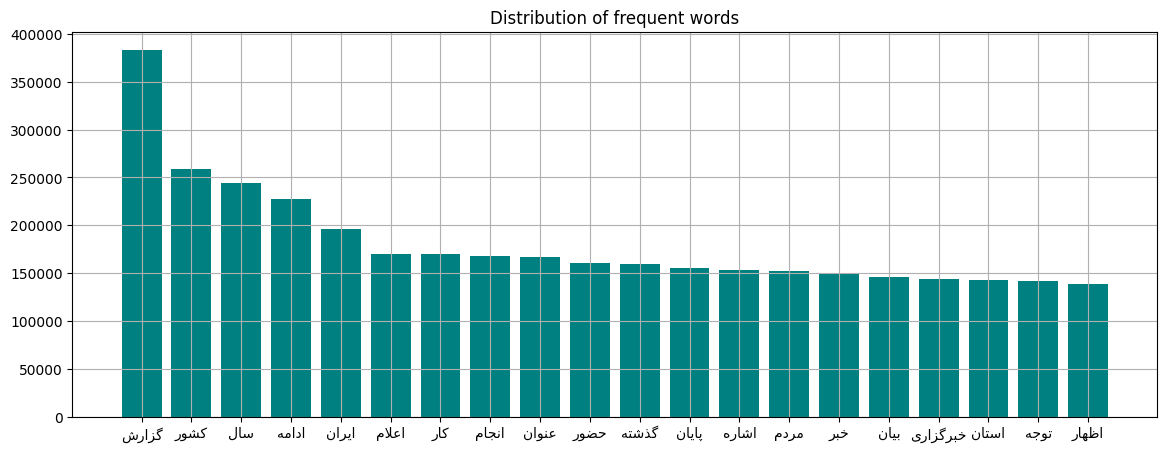

In [ ]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

f, ax = plt.subplots(figsize=(14,5))
words = [get_display(reshape(label[1])) for label in frequent_words]
count = [label[0] for label in frequent_words]
plt.bar(words,count,color="#008080")
plt.title("Distribution of frequent words")
plt.grid()

---
## $\text{Find the } \textit{word clouds } \text{of the news.}$

In [ ]:
!pip install wordcloud-fa

In [ ]:
from wordcloud_fa import WordCloudFa
import numpy as np

In [ ]:
def keywords_KeyValue(news):
    keywords = news.get('keywords')
    if keywords != None:
        KeyValue = [(key,1) for key in keywords]
    else:
        KeyValue = [('empty',0)]
    return KeyValue

In [ ]:
keywords_rdd = parsed_rdd.flatMap(lambda x: keywords_KeyValue(x))
keywords_rdd.count()

2739048

In [ ]:
keywords_count = keywords_rdd.reduceByKey(lambda a,b: a+b)
keywords_count.count()

521181

In [ ]:
sorted_keywords = keywords_count.map(lambda a: (2**np.log10(a[1]), a[0])).sortByKey()
sorted_keywords.count()

521181

In [ ]:
max_score = sorted_keywords.top(1)[0][0]
max_score

19.812077205362854

In [ ]:
normalized_sorted_rdd = sorted_keywords.map(lambda a: (a[0]/max_score,a[1]) )
normalized_sorted_rdd.count()

521181

In [ ]:
normalized_sorted_rdd.top(20)

[(1.0, 'رژیم صهیونیستی'),
 (0.9153835361235024, 'اسرائیل'),
 (0.8212246921831099, 'جمهوری اسلامی ایران'),
 (0.7451676515885112, 'غزه'),
 (0.7394615313215953, 'لیگ قهرمانان آسیا'),
 (0.7363438588848646, 'تیم ملی'),
 (0.7239635116902534, 'آموزش و پرورش'),
 (0.6955555918790012, 'جمهوری اسلامی'),
 (0.6675887614508967, 'فلسطین'),
 (0.6580118424770381, 'ایالات متحده'),
 (0.655299914935207, 'حماس'),
 (0.6533581120125306, 'اسلام'),
 (0.6400008319358191, 'طوفان الاقصی'),
 (0.6399173808248128, 'استقلال'),
 (0.6394579473932916, 'رئیس جمهور'),
 (0.6250389114260585, 'سیستان و بلوچستان'),
 (0.6229149527751284, 'بانک مرکزی'),
 (0.6116172477928972, 'سازمان ملل'),
 (0.5958543790760519, 'لایحه برنامه هفتم توسعه'),
 (0.5955093942849485, 'مجلس شورای اسلامی')]

In [ ]:
frequent_topics = normalized_sorted_rdd.top(20)

scores = [x[0] for x in frequent_topics]
topics = [x[1] for x in frequent_topics]

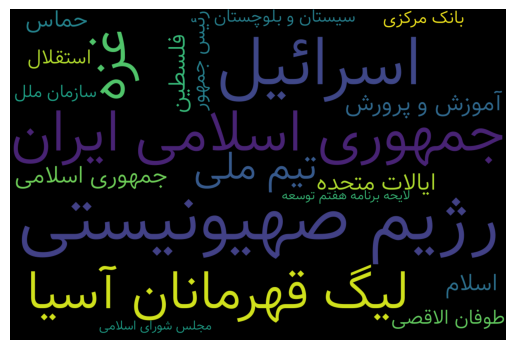

In [ ]:
wc = WordCloudFa(no_reshape=True,background_color="black",width=1200, height=800)
word_cloud = wc.generate_from_frequencies(dict(zip(topics, scores)))

plt.figure()
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

---
## $\text{Plot a timeline which shows total count of news per each day.}$

In [ ]:
def date_KeyValue(news):
    date = news.get('date_published')
    return [(date,1)]

In [ ]:
timeline_rdd = parsed_rdd.flatMap(lambda x: date_KeyValue(x))
timeline_rdd.count()

627164

In [ ]:
timeline_rdd.first()

(1696909606, 1)

In [ ]:
reduced_timeline_rdd = timeline_rdd.reduceByKey(lambda a,b: a+b)
reduced_timeline_rdd.count()

278256

In [ ]:
sorted_timeline_rdd = reduced_timeline_rdd.map(lambda a: (a[1], a[0])).sortByKey()
sorted_timeline_rdd.count()

278256

In [ ]:
high_news_days = sorted_timeline_rdd.top(30)

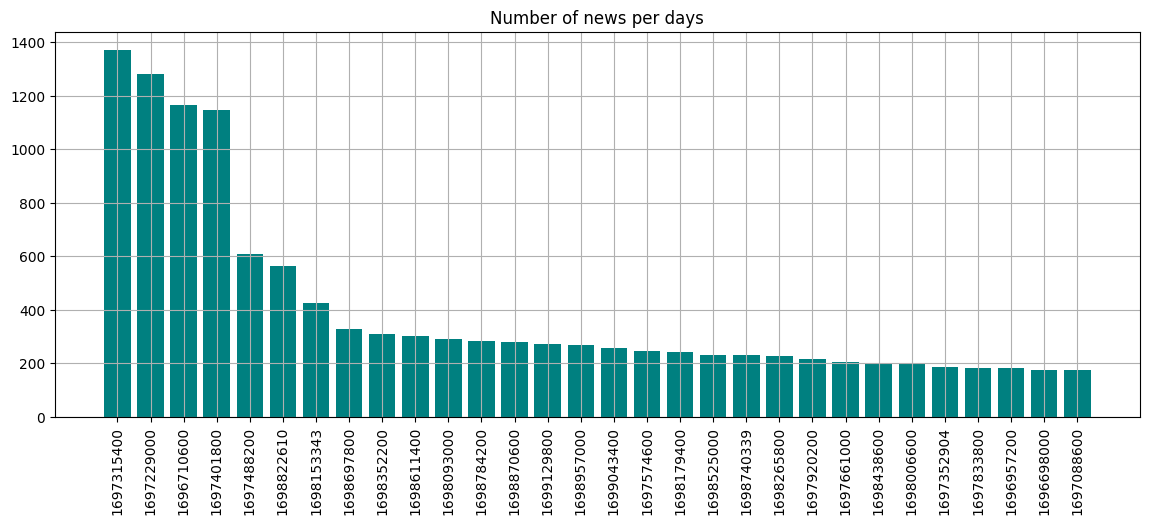

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
days = [str(day[1]) for day in high_news_days]
count = [day[0] for day in high_news_days]
plt.bar(days,count,color="#008080")
plt.title("Number of news per days")
plt.xticks(days, days, rotation='vertical')
plt.grid()

---
## $\text{Plot a timeline which shows total count of news per each day that have} \\ \text{at least one of the}\textit{ word clouds.}$

In [ ]:
def news_with_keywords(news,frequent_keywords):
    if news.get('keywords') == None:
        return [(str(news.get("date_published")),0)]

    for keyword in frequent_keywords:
        if keyword in news.get("keywords"):
          return [(str(news.get("date_published")),1)]
    return [(str(news.get("date_published")),0)]

In [ ]:
news_with_keywords_rdd = parsed_rdd.flatMap(lambda x: news_with_keywords(x,topics))
news_with_keywords_rdd.count()

627164

In [ ]:
reduced_news_with_keywords_rdd = news_with_keywords_rdd.reduceByKey(lambda a,b: a+b)
reduced_news_with_keywords_rdd.count()

278256

In [ ]:
sorted_news_with_keywords_rdd = reduced_news_with_keywords_rdd.map(lambda a: (a[1], a[0])).sortByKey()
sorted_news_with_keywords_rdd.count()

278256

In [ ]:
top20 = sorted_news_with_keywords_rdd.top(20)

In [ ]:
top20

[(280, '1697229000'),
 (278, '1697315400'),
 (242, '1697401800'),
 (229, '1696710600'),
 (160, '1697488200'),
 (115, '1698822610'),
 (99, '1698153343'),
 (90, '1698697800'),
 (71, '1698352200'),
 (64, '1699129800'),
 (64, '1697574600'),
 (63, '1698611400'),
 (62, '1698784200'),
 (56, '1698179400'),
 (55, '1698957000'),
 (54, '1698006600'),
 (49, '1699043400'),
 (49, '1698525000'),
 (48, '1697920200'),
 (46, '1698870600')]

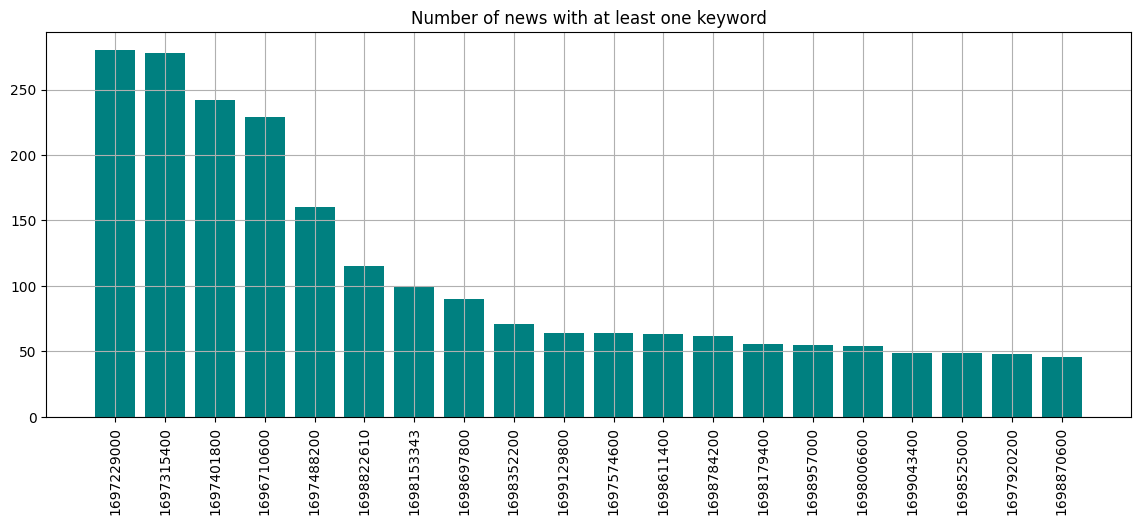

In [ ]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(figsize=(14,5))
days = [str(day[1]) for day in top20]
count = [day[0] for day in top20]
plt.bar(days,count,color="#008080")
plt.title("Number of news with at least one keyword")
plt.xticks(days, days, rotation='vertical')
plt.grid()
plt.show()

***

# $\text{Section 4: A-prior algorithm}$


---

## $\text{Find 3-sets words collections that appear together the most}$

In [ ]:
import itertools

In [ ]:
def A_prior_2tuples(one_news_body, two_tuples):
    frequent_two_tuples = []
    for one_tuple in two_tuples:
        cnt0 = one_news_body.count(one_tuple[0])
        cnt1 = one_news_body.count(one_tuple[1])
        frequent_two_tuples.append(((one_tuple[0],one_tuple[1]), min(cnt0,cnt1)))
    return frequent_two_tuples

In [ ]:
single_freq_words = [i[1] for i in top20]
two_tuples = itertools.combinations(single_freq_words,2)

In [ ]:
two_tuples = tuple(list(two_tuples))
two_tuples_rdd = processed_news_rdd.flatMap(lambda x:A_prior_2tuples(x.get("body"),two_tuples))
two_tuples_rdd.count()

119161160

In [ ]:
reduced_two_tuples_rdd = two_tuples_rdd.reduceByKey(lambda a,b: a+b)
reduced_two_tuples_rdd.count()

190

In [ ]:
sorted_two_tuples_rdd = reduced_two_tuples_rdd.map(lambda a: (a[1], a[0])).sortByKey()
sorted_two_tuples_rdd.top(50)

[(169324, ('گزارش', 'کشور')),
 (156349, ('گزارش', 'سال')),
 (150215, ('گزارش', 'ادامه')),
 (132067, ('کشور', 'سال')),
 (126856, ('گزارش', 'خبرگزاری')),
 (124708, ('گزارش', 'ایران')),
 (119497, ('کشور', 'ادامه')),
 (119265, ('گزارش', 'اعلام')),
 (117254, ('کشور', 'ایران')),
 (111844, ('سال', 'ادامه')),
 (109704, ('گزارش', 'پایان')),
 (109201, ('گزارش', 'انجام')),
 (108852, ('گزارش', 'عنوان')),
 (108222, ('گزارش', 'حضور')),
 (105997, ('گزارش', 'گذشته')),
 (105806, ('گزارش', 'کار')),
 (103391, ('گزارش', 'خبر')),
 (100282, ('سال', 'گذشته')),
 (100005, ('گزارش', 'اشاره')),
 (97350, ('گزارش', 'مردم')),
 (93727, ('سال', 'ایران')),
 (93577, ('گزارش', 'بیان')),
 (93497, ('سال', 'کار')),
 (93310, ('سال', 'عنوان')),
 (92204, ('گزارش', 'اظهار')),
 (91087, ('گزارش', 'استان')),
 (91081, ('کشور', 'عنوان')),
 (89724, ('کشور', 'مردم')),
 (89699, ('گزارش', 'توجه')),
 (88145, ('کشور', 'اشاره')),
 (87405, ('ادامه', 'کار')),
 (87176, ('ادامه', 'انجام')),
 (87124, ('سال', 'انجام')),
 (86454, ('کشور', 'انجام

In [ ]:
frequent_two_tuples = sorted_two_tuples_rdd.top(50)

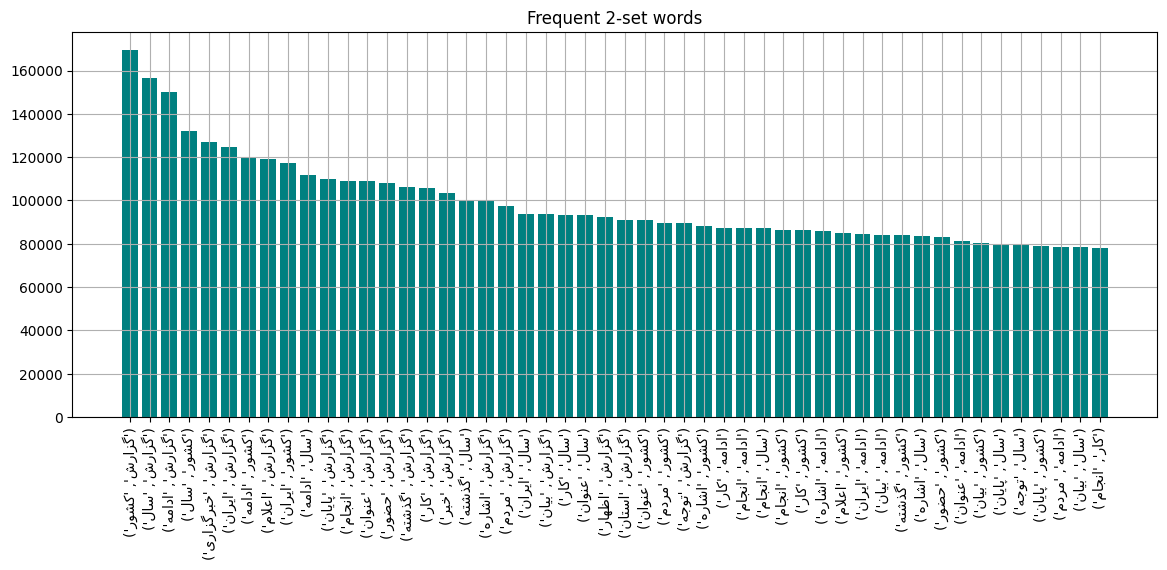

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
x_labels = [get_display(reshape(str(two_tuple[1]))) for two_tuple in frequent_two_tuples]
count = [two_tuple[0] for two_tuple in frequent_two_tuples]
plt.bar(x_labels,count,color="#008080")
plt.xticks(x_labels, x_labels, rotation='vertical')
plt.title("Frequent 2-set words")
plt.grid()

In [ ]:
def A_prior_3tuples(one_news_body, frequent_single_words, frequent_two_tuples):
    frequent_three_tuples = []
    candidate_three_tuples = []

    for x in frequent_two_tuples:
        for y in frequent_single_words:
            if y == x[0] or y == x[1]: # No duplication in tuple
              break
            three_tuple = x + (y,)
            all_two_tuples = itertools.combinations(three_tuple,2)
            for sub_tuple in all_two_tuples:
                if sub_tuple in frequent_two_tuples: # subsets must be frequent
                    candidate_three_tuples.append(three_tuple)

    for pairs in candidate_three_tuples:
        cnt0 = one_news_body.count(pairs[0])
        cnt1 = one_news_body.count(pairs[1])
        cnt2 = one_news_body.count(pairs[2])
        frequent_three_tuples.append(((pairs[0],pairs[1],pairs[2]),min(cnt0,cnt1,cnt2)))

    return frequent_three_tuples

In [ ]:
frequent_two_tuples = sorted_two_tuples_rdd.top(30)

In [ ]:
frequent_words_two_tuples = [x[1] for x in frequent_two_tuples]

In [ ]:
three_tuples_rdd = processed_news_rdd.flatMap(lambda x:A_prior_3tuples(x.get("body"),single_freq_words, frequent_words_two_tuples))
three_tuples_rdd.count()

10034624

In [ ]:
reduced_three_tuples_rdd = three_tuples_rdd.reduceByKey(lambda a,b: a+b)
reduced_three_tuples_rdd.count()

16

In [ ]:
sorted_three_tuples_rdd = reduced_three_tuples_rdd.map(lambda a: (a[1], a[0])).sortByKey()
sorted_three_tuples_rdd.top(20)

[(88002, ('کشور', 'سال', 'گزارش')),
 (81517, ('کشور', 'ادامه', 'گزارش')),
 (78276, ('کشور', 'ایران', 'گزارش')),
 (74070, ('سال', 'ادامه', 'گزارش')),
 (70384, ('سال', 'ادامه', 'کشور')),
 (66641, ('سال', 'ایران', 'کشور')),
 (66538, ('سال', 'گذشته', 'گزارش')),
 (61944, ('سال', 'گذشته', 'کشور')),
 (61452, ('سال', 'عنوان', 'گزارش')),
 (61377, ('کشور', 'عنوان', 'گزارش')),
 (60995, ('سال', 'ایران', 'گزارش')),
 (60103, ('کشور', 'اشاره', 'گزارش')),
 (59915, ('سال', 'کار', 'گزارش')),
 (59714, ('کشور', 'مردم', 'گزارش')),
 (59068, ('سال', 'عنوان', 'کشور')),
 (57583, ('سال', 'کار', 'کشور'))]

In [ ]:
frequent_three_tuples = sorted_three_tuples_rdd.top(20)

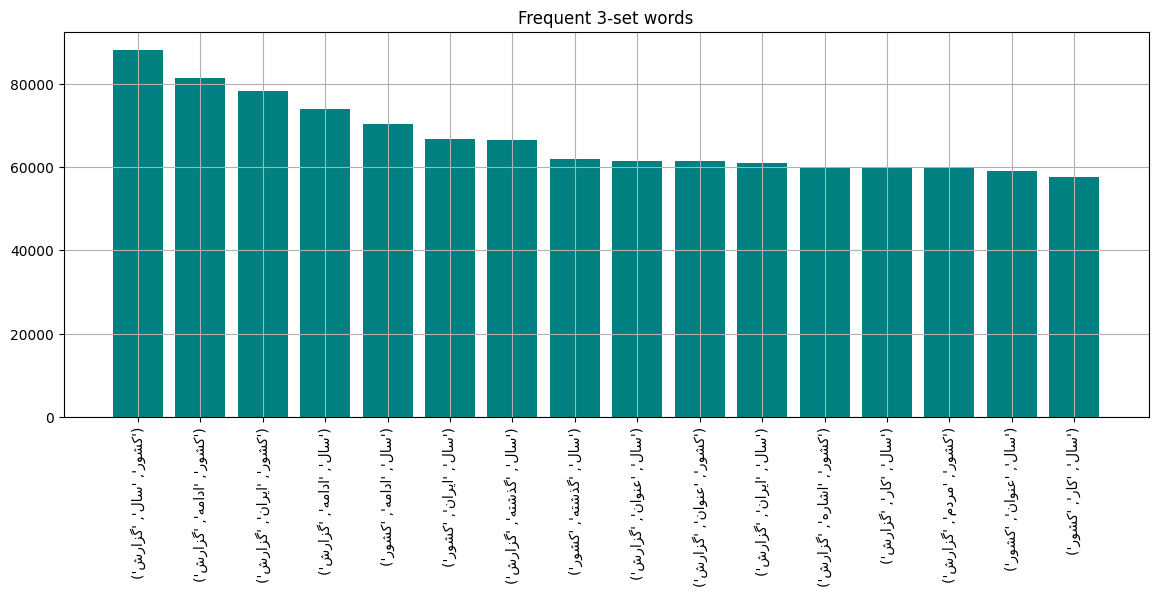

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
x_labels = [get_display(reshape(str(three_tuple[1]))) for three_tuple in frequent_three_tuples]
count = [three_tuple[0] for three_tuple in frequent_three_tuples]
plt.bar(x_labels,count,color="#008080")
plt.xticks(x_labels, x_labels, rotation='vertical')
plt.title("Frequent 3-set words")
plt.grid()

---

## $\text{Model Validation (TF-IDF)}$

In [ ]:
import numpy as np

def n_i_calc(news_body, frequent_words):
    cnt = [0,0,0]
    if frequent_words[0] in news_body:
       cnt[0] = 1
    if frequent_words[1] in news_body:
       cnt[1] = 1
    if frequent_words[2] in news_body:
       cnt[2] = 1
    return [(frequent_words[0],cnt[0]),(frequent_words[1],cnt[1]),(frequent_words[2],cnt[2])]

In [ ]:
n_i_rdd = processed_news_rdd.flatMap(lambda x: n_i_calc(x.get('body'), frequent_words))

In [ ]:
n_i_rdd_reduced = n_i_rdd.reduceByKey(lambda a,b:a+b)

In [ ]:
n_i_rdd_reduced.count()

3

In [ ]:
n_i_rdd_reduced.top(3)

[('گزارش', 383253), ('کشور', 258258), ('سال', 244481)]

In [ ]:
def TF_IDF(news,frequent_words,n_i,N,threshold):

    f = [news.get("body").count(frequent_words[i]) for i in range(0,len(frequent_words))]
    if len(news.get('body')) == 0:
        return []
    scores = [( f[i]/len(news.get("body")) ) * np.log10(1 + N/n_i[i][1]) for i in range(0,len(frequent_words))]

    high_score_news = []

    for i in range(0,len(frequent_words)):
        if scores[i] > threshold:
            high_score_news.append((frequent_words[i],news))

    return high_score_news

In [ ]:
N = 627164
n_i = n_i_rdd_reduced.top(3)
TF_IDF_score_rdd = processed_news_rdd.flatMap(lambda x: TF_IDF(x,frequent_words,n_i,N,0.06))
TF_IDF_score_rdd_grouped = TF_IDF_score_rdd.groupByKey()
collected = TF_IDF_score_rdd_grouped.map(lambda x : (x[0], list(x[1]))).collect()
collected

[('گزارش',
  [{'body': ['الجزیره',
     'غزه',
     'پرداختهاست',
     'قتلعام',
     'گزارش',
     'غیرنظامی',
     'مجروح',
     'اسرائیل'],
    'image_title_url': 'https://cdn.donya-e-eqtesad.com/thumbnail/3cJeFfKrSdm3/QHn8O9nsSzT8qCU7RegsN6Pbb5v74eEtbKeSOh05RaYq672OrIRuQkt7TZyzEhnm/AP23280355081673.jpg',
    'language': 'fa',
    'source': 'روزنامه دنیای اقتصاد',
    'title': 'گزارشی تکان دهنده از قتل\u200cعام در شهر الزهرای غزه+ فیلم',
    'date_published': 1698190443,
    'uid': '0283ab8596a77006eff697219',
    'url': 'https://donya-e-eqtesad.com/بخش-%D8%B3%D8%A7%DB%8C%D8%AA-%D8%AE%D9%88%D8%A7%D9%86-62/4013982-%DA%AF%D8%B2%D8%A7%D8%B1%D8%B4%DB%8C-%D8%AA%DA%A9%D8%A7%D9%86-%D8%AF%D9%87%D9%86%D8%AF%D9%87-%D8%A7%D8%B2-%D9%82%D8%AA%D9%84-%D8%B9%D8%A7%D9%85-%D8%AF%D8%B1-%D8%B4%D9%87%D8%B1-%D8%A7%D9%84%D8%B2%D9%87%D8%B1%D8%A7%DB%8C-%D8%BA%D8%B2%D9%87-%D9%81%DB%8C%D9%84%D9%85',
    'crawler_timestamp': 1698190779,
    'ingestor_timestamp': 1698206973,
    'summary': 'الجزیره در گزارشی به